In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start ='2012-01-01'
end ='2023-12-01'

stock = 'GOOG'

data= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
2993,2023-11-24,139.539993,139.677002,137.470001,138.220001,137.881378,8828600
2994,2023-11-27,137.570007,139.630005,137.539993,138.050003,137.711807,17886400
2995,2023-11-28,137.630005,138.660004,137.039993,138.619995,138.280396,17046900
2996,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.065842,21014700


In [5]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

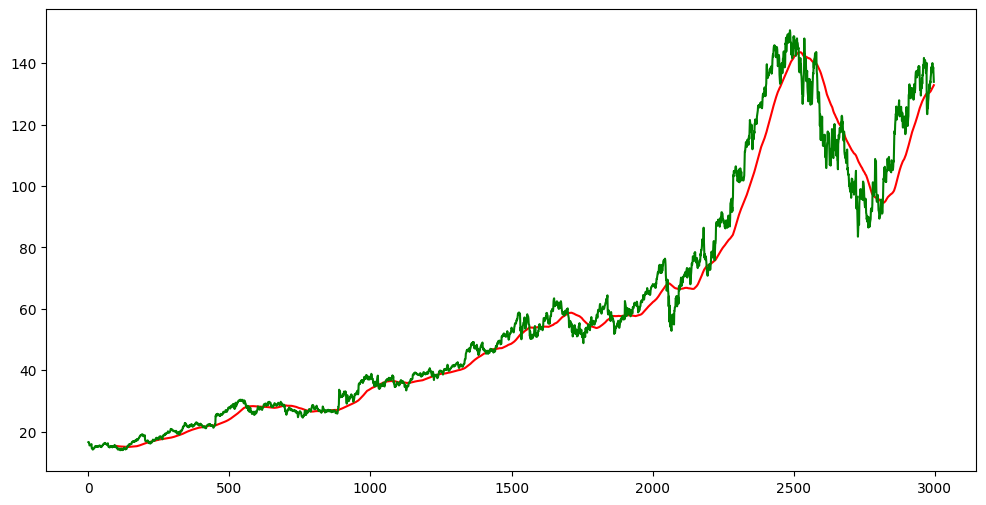

In [6]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show

In [7]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

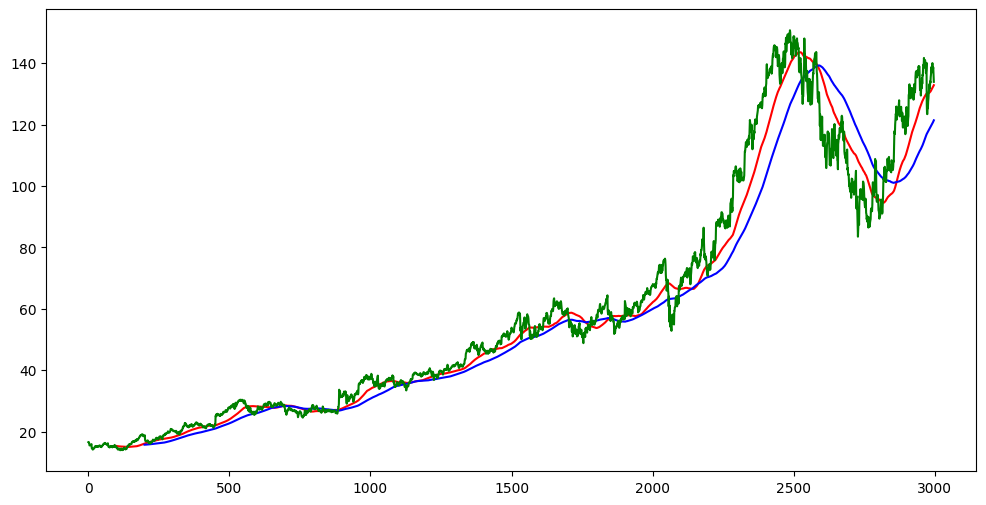

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g')
plt.show

In [9]:
data.dropna(inplace=True)

In [10]:
data_train= pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):int(len(data))])

In [11]:
data_train.shape[0]

2398

In [12]:
data_test.shape[0]

600

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [14]:
data_train_scale= scaler.fit_transform(data_train)


In [15]:
x =[]
y=[]
for i in range  (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences=True,
              input_shape= ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences=True,))            
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\vishn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 320ms/step - loss: 0.0362
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - loss: 0.0051
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - loss: 0.0042
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 335ms/step - loss: 0.0042
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 359ms/step - loss: 0.0037
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 325ms/step - loss: 0.0031
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 335ms/step - loss: 0.0031
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 323ms/step - loss: 0.0035
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 324ms/step - loss: 0.0027
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 336ms/step - loss: 0.0028
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 329ms/step - loss: 0.0032
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - loss: 0.0029
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 334ms/step - loss: 0.0023
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 333ms/step - loss: 0.0028
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 80)                  │          51,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,285 (1.53 MB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 267,524 (1.02 MB)

In [22]:
pas_100_days= data_train.tail(100)

In [23]:
data_test= pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale =scaler.fit_transform(data_test)

In [25]:
 x =[]
y=[]
for i in range  (100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x),np.array(y)

In [26]:
y_predict =model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step


In [27]:
scale=1/scaler.scale_

In [28]:
y_predict= y_predict*scale

In [29]:
y= y*scale

<function matplotlib.pyplot.show(close=None, block=None)>

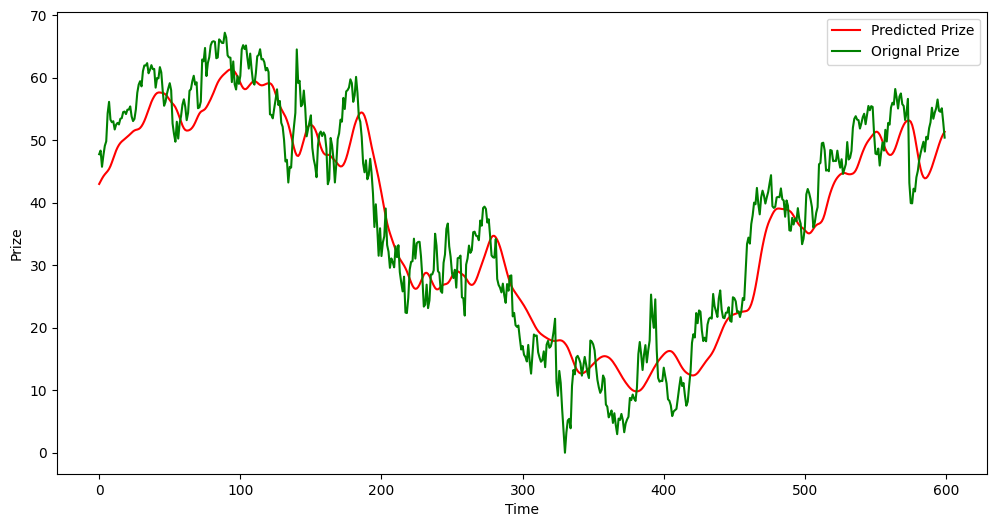

In [30]:
plt.figure(figsize=(12,6) )
plt.plot(y_predict,'r',label='Predicted Prize')
plt.plot(y, 'g', label = 'Orignal Prize')
plt.xlabel('Time')
plt.ylabel('Prize')
plt.legend()
plt.show

In [31]:
model.save('stock_predictor.keras')